## Exercise 2: Clustering and  Centrality Measures

In this networks, we are once again going to work with the Jazz musician network the we have already used in last week's exercise. Throughout this exercise, we will denote this graph with $G$, and its adjacency matrix with $A$.

In [21]:
import networkx as nx
from typing import List, Optional, Tuple, Dict

In [22]:
G = nx.read_edgelist('jazz.txt', nodetype=int)

### Task 1: Clustering

__a)__ Determine the average local clustering coefficient of all nodes in the graph!

In [23]:
nx.average_clustering(G)

0.6174507021536305

__b)__ Print all nodes in the network which have a local clustering of 1!

In [24]:
C = nx.clustering(G)

In [25]:
C

{0: 0.6561264822134387,
 7: 0.7428571428571429,
 23: 0.4802955665024631,
 34: 0.6356589147286822,
 41: 0.5151515151515151,
 45: 0.6482213438735178,
 59: 0.31162280701754386,
 73: 0.5157894736842106,
 77: 0.46153846153846156,
 80: 0.4831591173054588,
 94: 0.5128205128205128,
 97: 0.6405797101449275,
 98: 0.46497175141242936,
 99: 0.5952380952380952,
 100: 0.592687074829932,
 102: 0.4624505928853755,
 103: 0.5157894736842106,
 107: 0.4858757062146893,
 130: 0.512987012987013,
 131: 0.40396396396396395,
 153: 0.6356589147286822,
 158: 0.4666666666666667,
 167: 0.36208811551277303,
 170: 0.4626262626262626,
 1: 1.0,
 13: 0.7066666666666667,
 53: 0.4473429951690821,
 149: 0.5222672064777328,
 2: 1.0,
 114: 0.38095238095238093,
 152: 0.2865853658536585,
 166: 0.44242424242424244,
 171: 0.5294871794871795,
 3: 0.825,
 4: 0.421256038647343,
 12: 0.6733333333333333,
 25: 0.6903225806451613,
 76: 0.6798029556650246,
 84: 0.8771929824561403,
 101: 0.8947368421052632,
 137: 0.6679841897233202,
 14

In [26]:
print([k for k,v in sorted(C.items()) if v == 1.0])

[1, 2, 5, 21, 40, 44, 81, 112, 144, 185]


__c)__ Create a plot of the graph in which all nodes are colored proportional to their local clustering coefficient!

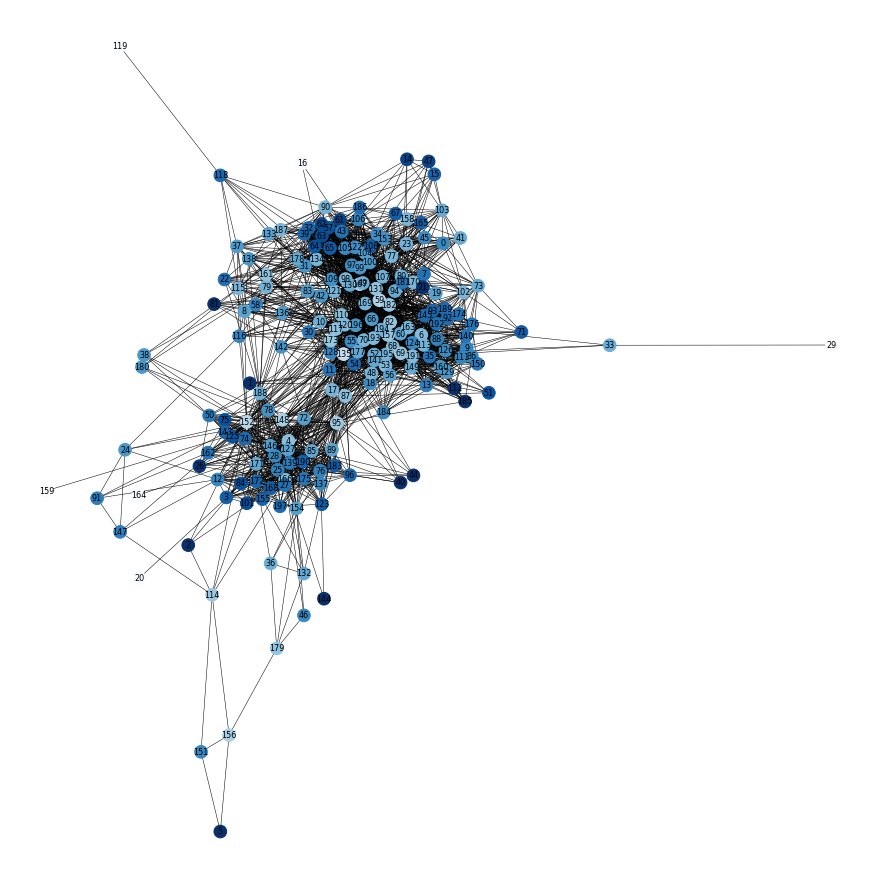

In [27]:
import matplotlib.pyplot as plt

options = {
    'node_size': 160,
    'width': 0.5,
    'with_labels' : True,
    'font_size': 8,
    'node_color': list(C.values()),
    'cmap': plt.cm.Blues
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)

### Task 2: Katz Centrality

__a)__ Apply networkX to compute the Katz centrality of all nodes in the graph (using default parameters $\alpha=0.1$ and $\beta = 1$). Note that networkX offers two functions for this, and that by default the centrality vectors are normalized so that its $L_2$-Norm equals 1.
Why does one method fail?

In [28]:
CK = nx.katz_centrality(G)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [29]:
# use direct solver built on numpy instead, note that this does not scale well to larger graphs either
CK = nx.katz_centrality_numpy(G)

In [30]:
CK

{0: -0.11409337718848789,
 7: -0.010910431244823812,
 23: -0.06985614541725238,
 34: -0.07500386535044347,
 41: -0.10084409203159973,
 45: -0.1407749053997216,
 59: -0.07038119673813835,
 73: -0.03174040933266877,
 77: -0.0022622923049456702,
 80: -0.07007183364379599,
 94: -0.03042588491383662,
 97: 0.013633341159878038,
 98: 0.02727357669798766,
 99: 0.015447676191925578,
 100: -0.005781451030921014,
 102: -0.009863437466497583,
 103: -0.10585461045453279,
 107: -0.03830368455439854,
 130: -0.021454114776023606,
 131: -0.06426608186095954,
 153: -0.07500386535044333,
 158: -0.024532193925145,
 167: 0.04409452180772938,
 170: -0.09587107290946731,
 1: -0.019474840209542727,
 13: -0.010539623092303229,
 53: -0.043656903598995066,
 149: 0.05762944363265525,
 2: -0.00039637378390777105,
 114: -0.005865327949368384,
 152: 0.17659516534533085,
 166: -0.008283024586654497,
 171: 0.031770768388398554,
 3: -0.03676960527083309,
 4: 0.026623309945199722,
 12: -0.038760088889613825,
 25: -0.046

**Answer:** The non-numpy method does not converge, as the default parameter value $\alpha = 0.1$ might be too large, i.e. bigger than $\lambda_{max}^{-1}$. For that reason, the numpy version also yields negative centralities.

__b)__ Apply the linalg module from numpy or scipy to compute the largest eigenvalue $\lambda_{max}$ of the adjacency matrix of $G$, and its inverse value, which yields the maximum value of alpha that can be used to determine Katz centrality.

In [31]:
import numpy as np
from numpy import linalg as la

In [32]:
ev_max = max(la.eigvals(nx.to_numpy_matrix(G)))
print((ev_max,1/ev_max))

(40.02737591275815, 0.024982901756526697)


__c)__ For some $\alpha < \lambda_{max}^{-1}$, compute the 10 most central nodes in the network, and plot the network using a spring layout with the most central nodes having a distinct color. Feel free to try out other values of $\alpha$.

In [33]:
for alpha in [1/10**j/ev_max for j in range(10,0,-1)]:
    
    C = nx.katz_centrality_numpy(G,alpha=alpha)
    central_nodes = sorted(C, key=C.get, reverse=True)[:10]
    outer_nodes = sorted(C, key=C.get, reverse=False)[:10]
    print("alpha: " + str(alpha))
    print(central_nodes)
    print(outer_nodes)
    #print([(v,C[v],G.degree(v)) for v in central_nodes])


alpha: 2.4982901756526697e-12
[135, 59, 131, 167, 69, 98, 107, 82, 157, 6]
[20, 29, 119, 159, 164, 5, 16, 144, 1, 151]
alpha: 2.4982901756526698e-11
[135, 59, 131, 167, 69, 98, 107, 82, 157, 6]
[20, 29, 119, 159, 164, 5, 16, 144, 1, 151]
alpha: 2.4982901756526695e-10
[135, 59, 131, 167, 69, 98, 107, 82, 157, 6]
[20, 29, 119, 159, 164, 5, 16, 144, 1, 151]
alpha: 2.4982901756526696e-09
[135, 59, 131, 167, 69, 107, 98, 82, 157, 6]
[20, 29, 119, 164, 159, 5, 144, 16, 151, 46]
alpha: 2.4982901756526694e-08
[135, 59, 131, 167, 69, 107, 98, 82, 157, 6]
[29, 119, 164, 20, 159, 5, 144, 16, 151, 46]
alpha: 2.49829017565267e-07
[135, 59, 131, 167, 69, 107, 98, 82, 157, 6]
[29, 119, 164, 20, 159, 5, 144, 16, 151, 46]
alpha: 2.4982901756526697e-06
[135, 59, 131, 167, 69, 107, 98, 82, 157, 6]
[29, 119, 164, 20, 159, 5, 144, 16, 151, 46]
alpha: 2.4982901756526695e-05
[135, 59, 131, 167, 69, 107, 98, 82, 157, 6]
[29, 119, 164, 20, 159, 5, 144, 16, 151, 46]
alpha: 0.00024982901756526697
[135, 59, 131, 

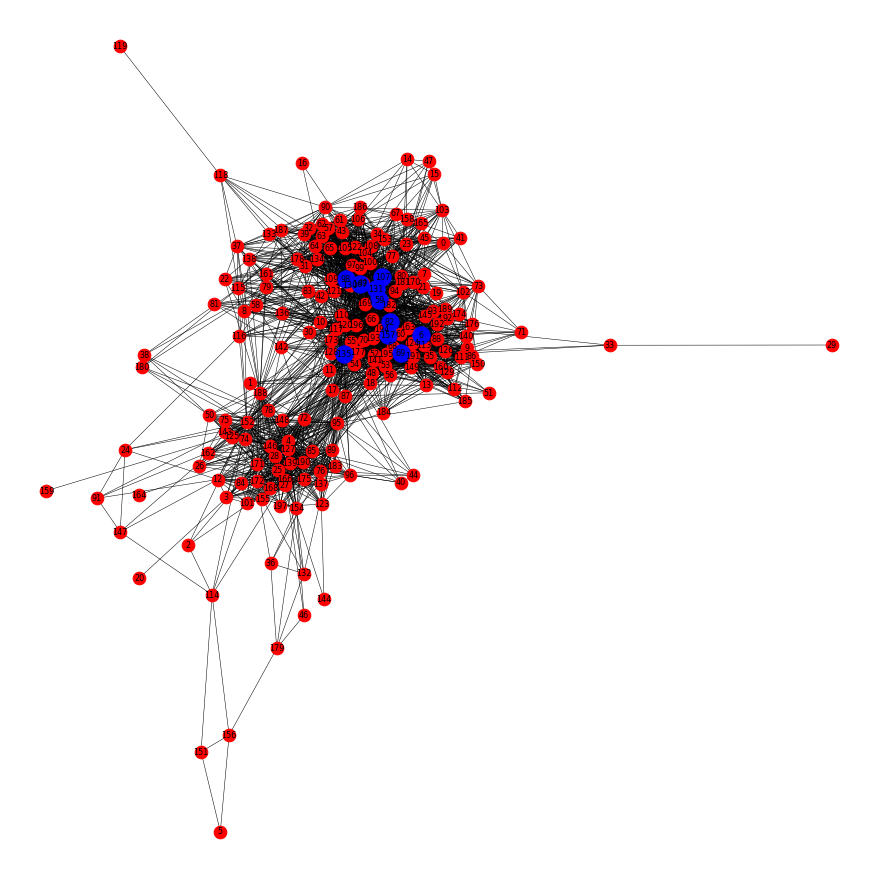

In [34]:
C = nx.katz_centrality_numpy(G,alpha=0.01)
options = {
'node_size': 160,
'width': 0.5,
'with_labels' : True,
'font_size': 8,
'node_color': 'red'
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G,pos,nodelist=central_nodes,node_color='blue')


### Task 3: Eigenvalue Centrality and PageRank

__a)__ Apply networkX to compute the Eigenvector centrality of $G$. What are the most central nodes according to this measure? Do they coincide with the most central nodes with respect to Katz centrality? Again, plot the network with the 10 most central nodes in a distinct color. Note that you can fix the orientation of the plotted network by setting a seed in the layout that you pass to the `pos` argument in `nx.draw()`.

[59, 131, 135, 167, 107, 98, 130, 69, 82, 193]


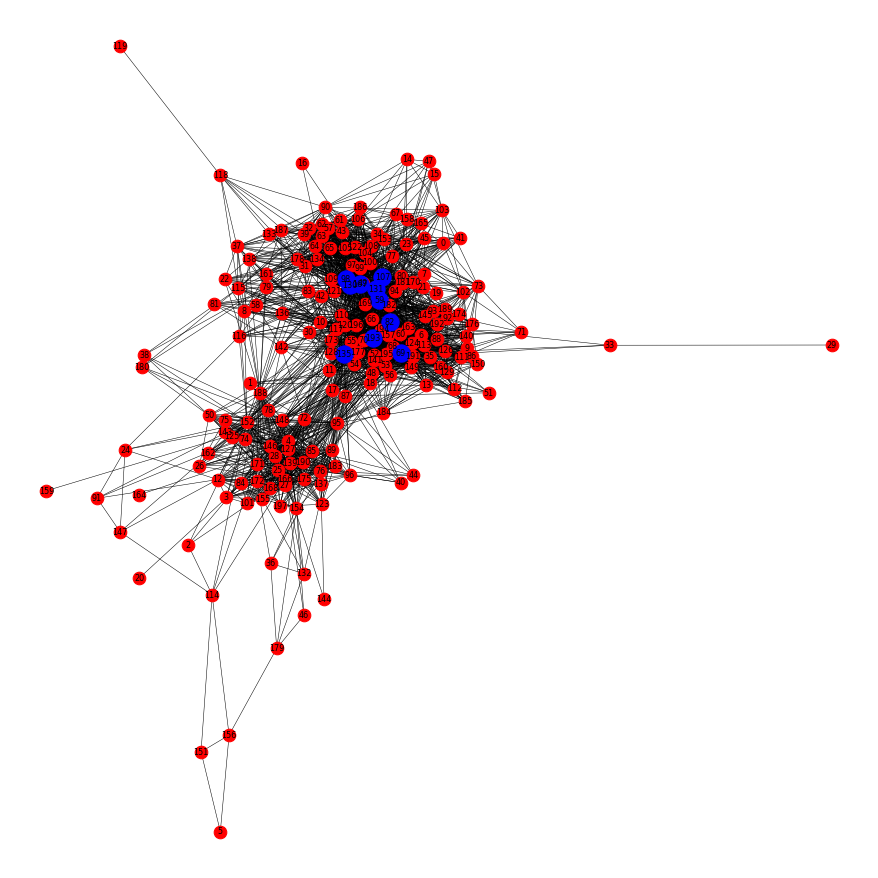

In [35]:
CE = nx.eigenvector_centrality(G)
central_nodes = sorted(CE, key=CE.get, reverse=True)[:10]
print(central_nodes)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G,pos,nodelist=central_nodes,node_color='blue')


While the 10 most central nodes do not exactly math compared to Katz centrality, the notion of similarity appears similar across both measures.  
Note that for this graph, the attenuating factor does not appear to have much effect regarding which nodes are most central.

__b)__ In a normalized version of the eigenvector centrality, each row of $A$ is normalized by the (out-)degree of the corresponding node, i.e., we obtain the normalized matrix $P$ with
$$P_{ij} = 1/k_i^{out} \cdot A_{ij}\ .$$
Intuitively, this matrix models the probability that a random walker at node $i$ will move to node $j$ in the next step of his walk. Assuming a (strongly) connected graph, the eigenvector centrality of node $i$ then models the probability that after $n\rightarrow\infty$ steps, the random walker is at node $i$.  
The eigenvector centrality of the matrix can be computed via the equation
$P^Tx$ = $\lambda_1 x$, i.e., the left eigenvector of $P$ corresponding to the biggest eigenvalue.
Write a function that computes the normalized eigenvector centrality, using the function signature in the cell below.

In [36]:
def normalized_eigencentrality(G: nx.Graph) -> Dict[int, float]:
    """
    :param G: networkX graph, might be directed
    :
    :return: dict with node ID as keys and pagerank score as value
    """
    
    A = np.array(nx.to_numpy_matrix(G))
    row_sums = A.sum(axis=1)
    P = A / row_sums[:, np.newaxis]
    ec = np.linalg.eig(P.T)[1][:,0]
    nodelist=list(G.nodes)
    return dict({nodelist[i]:ec[i] for i in range(G.number_of_nodes())})

__c)__ Apply the eigenvalue to $G$. How does the result relate to your result in __a)__? Again, determine the nodes with the ten highest centralities, and plot the graph as in 2c) and 3a)!

[135, 59, 131, 167, 69, 98, 107, 82, 157, 6]


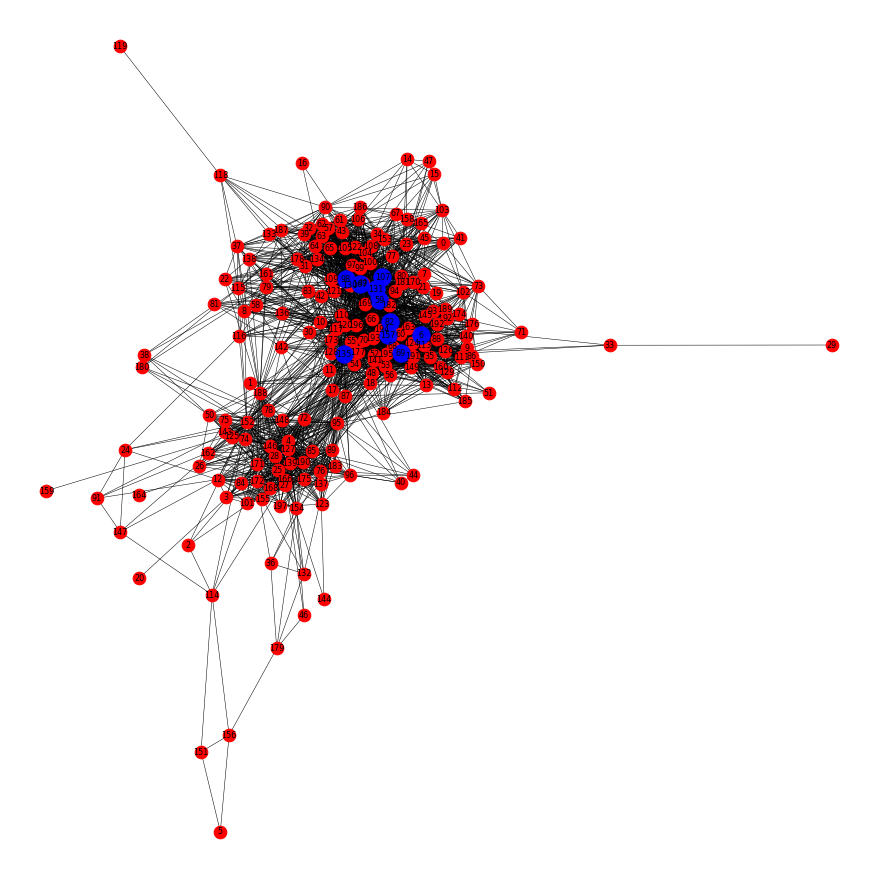

In [37]:
NEC = normalized_eigencentrality(G)

central_nodes = sorted(NEC, key=NEC.get, reverse=True)[:10]
print(central_nodes)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G,pos,nodelist=central_nodes,node_color='blue')


We obtain similar results as in the non-normalized variant, but there are some changes.

__d)__ Compute the normalized eigenvector centrality of the directed path graph $H$ that is initialized in the cell below. Note that since the last node does not have an outgoing link, we give it a self-loop. What do you observe?

In [16]:
H = nx.path_graph(10, create_using=nx.DiGraph())
H.add_edge(9,9)
print(H.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 9)]


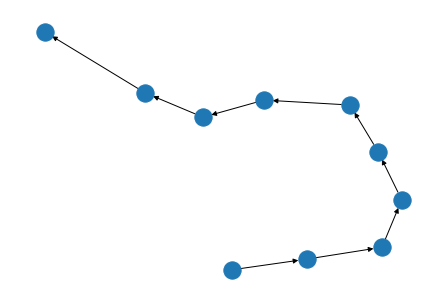

In [38]:
nx.draw(H)

In [39]:
normalized_eigencentrality(H)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 1.0}

The full centrality score gets into the sink node, which, from the random walker perspective, is completely intuitive, as the random walker eventually will end up in the sink node.

__e)__ To account for such "spider traps" in random walks, the __PageRank__ algorithm introduces the concept of random restarts. Assuming that during a random walk we are currently at node $i$, we either follow one of its outgoing links, or we randomly teleport to any other node in the network. To model this setting, a _damping factor_ $s\in (0,1)$ is introduced, which models the probability that the random walker decides to follow an outgoing link in the network instead of randomly teleporting, i.e., for $s=0.9$ the random walker will follow an outgoing edge with 90\% probability, and randomly teleport with a probability of 10\%.
Using these variables, the PageRank centrality $x^{PR}_i$ of node $i$ is defined as
$$
x^{PR}_i = s\sum_{j=1}^N P_{ji}x^{PR}_j + (1-s)/N \ .
$$
Note that while this equation can be directly solved algebraically, the more efficient way to compute the PageRank vector $X^{PR}$ via the following iteration (using theory on Markov chains, one can prove that this iteration always converges):
$$
 X^{PR} \gets sP^TX^{PR} + (1-s)/Ne
$$
where $e$ is the $n$-dimensional vector in which all elements equal $1$, and where $X^{PR}$ can be initialized randomly as long as its elements sum to 1.

Write a function that computes the PageRank centrality of a given a graph, using the signature in the cell below. Initialize your centrality vector by setting all its elements to $1/N$.

__Note:__ The PageRank algorithm is named after Larry Page, the co-founder of Google, who has initially invented this algorithm to rank webpages which fit a web search query. More details on this algorithm and its real-life adaptations are taught in our lecture on _Web Mining_.

In [40]:
def pagerank(G: nx.Graph, s: Optional[float]=0.85, eps: Optional[float]=1e-06, max_iter: Optional[int]=1000) -> Dict[int, float]:
    """
    :param G: networkX graph, might be directed
    :param s: damping factor
    :param eps: tolerance for convergence, iteration should be stopped when ||X-X_old||_2 < eps
    :param max_iter: maximum number of iterations after which to break
    :
    :return: dict with node ID as keys and pagerank score as value
    """
    
    N=G.number_of_nodes()
    A = np.array(nx.to_numpy_matrix(G))
    row_sums = A.sum(axis=1)
    P = A / row_sums[:, np.newaxis]
    PT = P.T
    X_new = 1/N*np.ones(N)
    X_old = np.zeros(N)
    e = np.ones(N)
    n_iter = 0
    while np.linalg.norm(X_new-X_old) > eps and n_iter < max_iter:
        X_old = np.copy(X_new)
        X_new = s*PT.dot(X_old) + (1-s)/N*e
        n_iter += 1
    
    nodelist=list(G.nodes)
    return dict({nodelist[i]:X_new[i] for i in range(G.number_of_nodes())})

__f)__ Apply your implementation to compute the PageRank of the nodes in $G$ and in the path graph $H$. One final time, determine the nodes with the ten highest centralities in $G$, and plot the graph as in 2c) and 3a)!

In [41]:
pagerank(H)

{0: 0.015000000000000003,
 1: 0.027750000000000004,
 2: 0.03858750000000001,
 3: 0.047799375000000005,
 4: 0.05562946875000001,
 5: 0.062285048437500004,
 6: 0.067942291171875,
 7: 0.07275094749609376,
 8: 0.0768383053716797,
 9: 0.5354170637728516}

[135, 59, 167, 131, 148, 69, 166, 82, 95, 4]


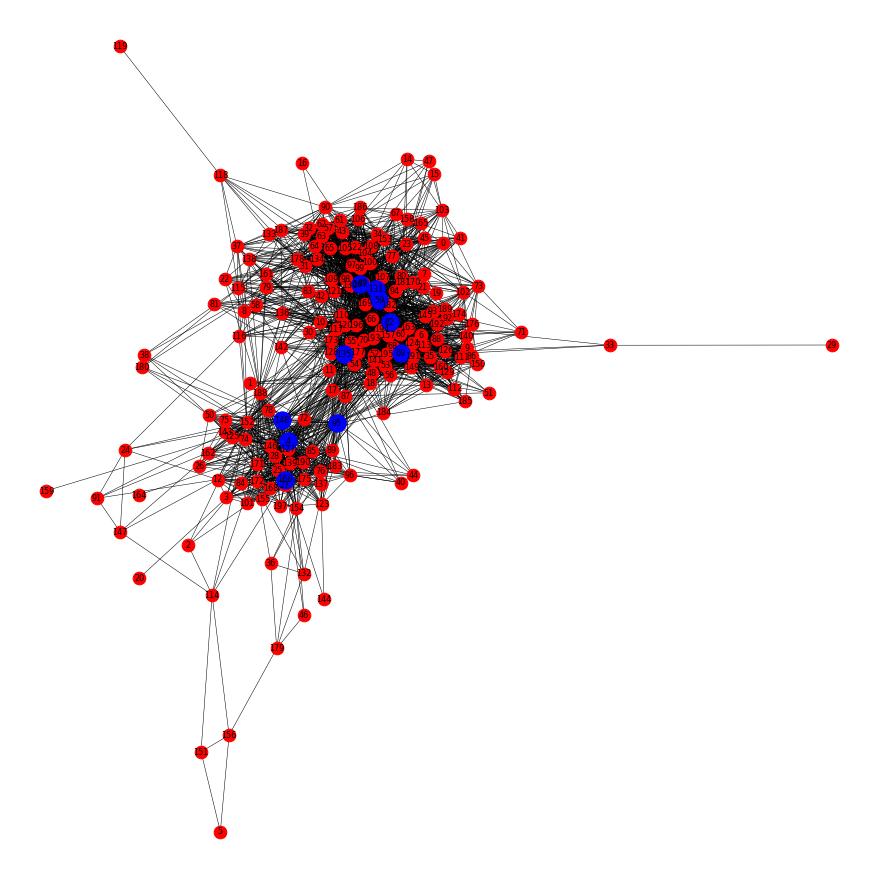

In [42]:
PR = pagerank(G)

central_nodes = sorted(PR, key=PR.get, reverse=True)[:10]
print(central_nodes)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G,pos,nodelist=central_nodes,node_color='blue')

Note how in the path graph, every node now has a value bigger than 0, which is increasing the closer we get to the sink node.  
Regarding $G$, we can see how pagerank also considers nodes from the second biggest cluster as central nodes.